### Trying to cluster

In [8]:
import functions

import os
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for clustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# for statistical tests
from scipy.stats import ttest_rel, ttest_ind
from statsmodels.stats.multitest import multipletests

In [35]:
import importlib
importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

In [10]:
excel_folder_path = "data/"
regression_info, rsfMRI_full_info = functions.load_excel_data(excel_folder_path)
folder_path = "FC_matrices_times_wp11/"

rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]
rois_sub = rois
rois_full = np.arange(0, 379)

In [11]:

# Folder containing the data
folder_path = "FC_matrices_times_wp11/"

# keep only ROIS
rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]

t1_matrices, t1_subjects, yeo_mat_t1_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='t1_only')
all_matrices, all_subjects, yeo_mat_all_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='all')
t1_t3_matched, t1_t3_subjects, yeo_mat_t1_t3_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='t1_t3_matched')
t1_t4_matched, t1_t4_subjects, yeo_mat_t1_t4_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='t1_t4_matched')
t1_t3_matrices, t1_t3_subjects, yeo_mat_t1_t3_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='t1_t3')
t1_t4_matrices, t1_t4_subject, yeo_mat_t1_t4_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, type='t1_t4')
#matrices = functions.matrices_to_wide_df(matrices)
all_matrices.T1_matrix.shape

(73,)

Better to keep T1 and T3 as more subjects have these two !
From now on I'll work with matrices

In [12]:
print("matrices column names: ", t1_t3_matrices.columns)

matrices column names:  Index(['subject_id', 'T1_matrix', 'T3_matrix', 'subject_full_id',
       'Lesion_side', 'Stroke_location', 'lesion_volume_mm3', 'Gender', 'Age',
       'Education_level', 'Combined', 'Bilateral'],
      dtype='object')


##### Cluster for all matrices

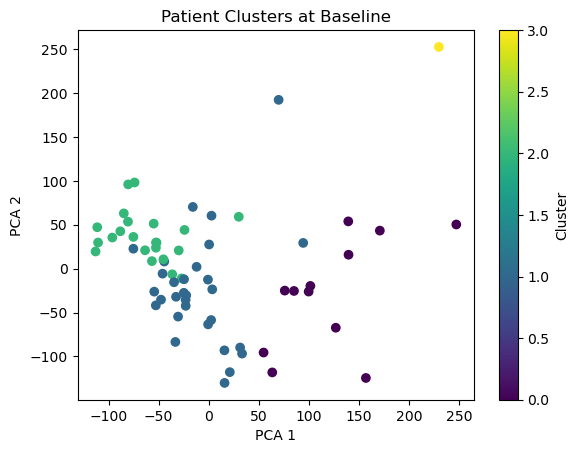

Silhouette score: 0.024481079174278983
Cluster 0: ['s054', 's039', 's048', 's082', 's071', 's047', 's033', 's016', 's045', 's080', 's072', 's086']
Cluster 1: ['s007', 's062', 's008', 's037', 's030', 's006', 's055', 's052', 's063', 's041', 's046', 's070', 's015', 's049', 's076', 's078', 's025', 's057', 's068', 's050', 's004', 's003', 's032', 's067', 's005', 's027', 's020', 's011', 's074', 's019']
Cluster 2: ['s031', 's009', 's036', 's065', 's001', 's083', 's012', 's040', 's014', 's013', 's022', 's066', 's059', 's051', 's060', 's002', 's029', 's042', 's017', 's021', 's081', 's075']
Cluster 3: ['s073']
Silhouette score: 0.021924092422265305
Cluster 0: ['s063', 's015', 's082', 's021']
Cluster 1: ['s007', 's031', 's054', 's008', 's037', 's030', 's039', 's006', 's055', 's052', 's046', 's070', 's048', 's083', 's049', 's076', 's078', 's047', 's040', 's014', 's013', 's025', 's022', 's059', 's057', 's068', 's050', 's032', 's051', 's060', 's067', 's016', 's011', 's074', 's017', 's019', 's072', 's

In [13]:
categorical_cols = ['Lesion_side', 'Stroke_location','Education_level','Combined', 'Bilateral']
numerical_cols = ['lesion_volume_mm3','Age','Gender']

all_matrices_labeled = functions.cluster_and_plot(all_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=True)
t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=False)
t1_t4_matrices_labeled = functions.cluster_and_plot(t1_t4_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=False)

# NORMAL THAT WE GET THE SAME CLUSTERS FOR ALL TIMEPOINTS
# because we are using the same data for clustering (T1)

#### Version Chat payant:

Flattening FC matrices on 65 subjects...
[INFO] Missing numerical values detected. Imputing with column means...
Applying PCA...
Testing different cluster numbers...


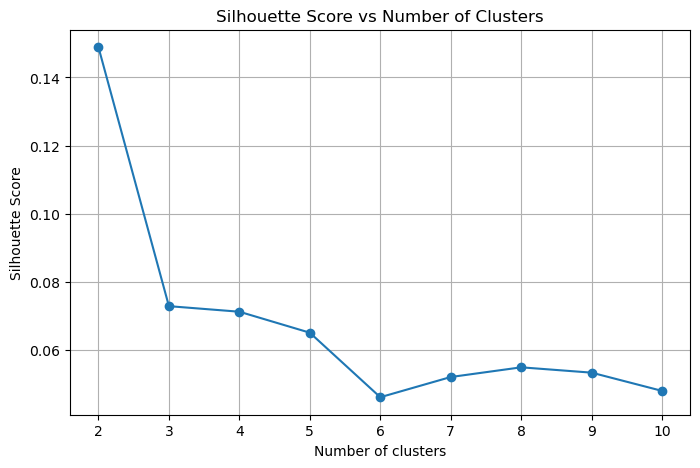

Best number of clusters according to silhouette score: 2


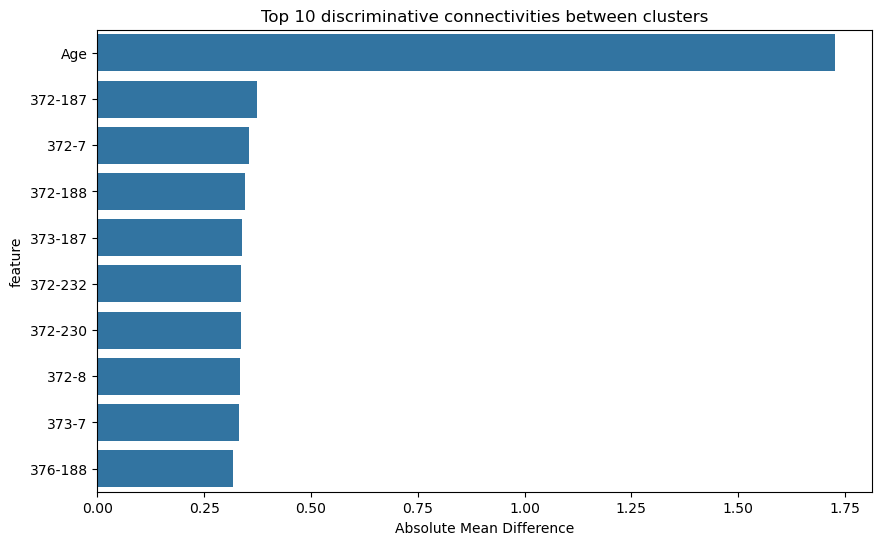

In [14]:
selected_rois_labels = [362, 363, 364, 367, 371, 372, 373, 376] 

t1_t3_matrices_labeled, clusters, silhouette_scores, pca_features, scaler, pca, all_features, feature_names = functions.cluster_subjects(
    t1_t3_matrices, 
    selected_rois_labels, 
    matrix_column='T1_matrix', 
    numerical_cols=numerical_cols, 
    categorical_cols=categorical_cols
)

importance_df = functions.compute_feature_importance(all_features, clusters, feature_names)

Flattening FC matrices on 65 subjects...
[INFO] Missing numerical values detected. Imputing with column means...
Applying PCA...
Testing different cluster numbers...


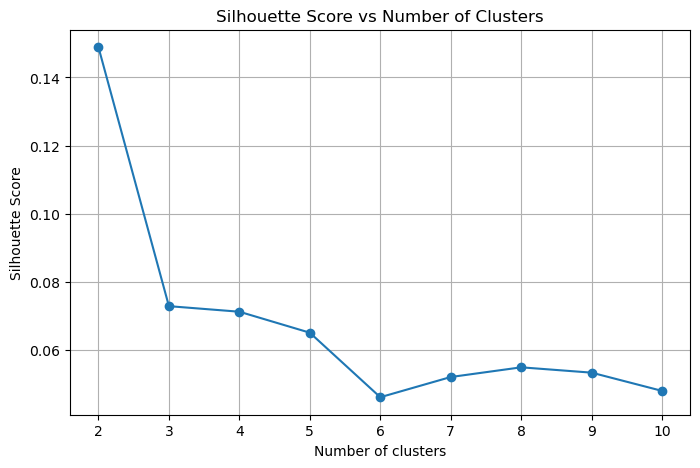

Best number of clusters according to silhouette score: 2


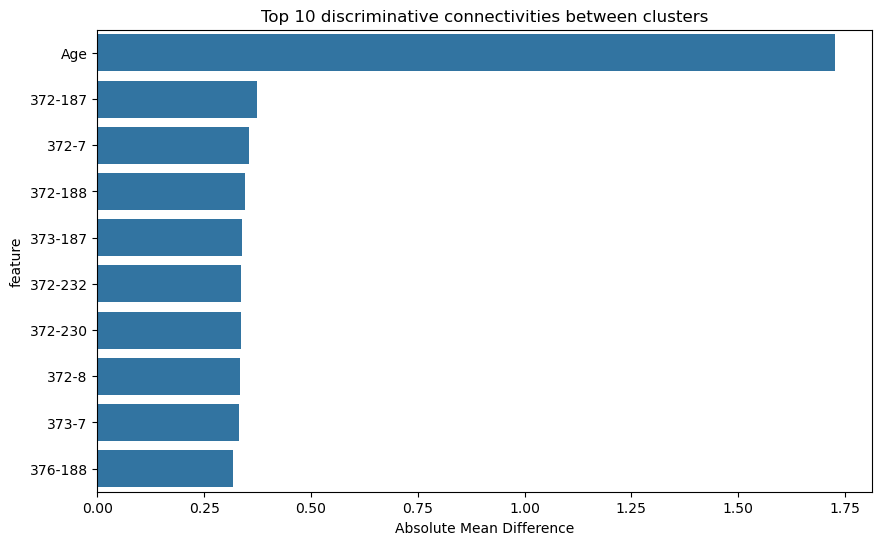

In [15]:
t1_t4_matrices_labeled, clusters, silhouette_scores, pca_features, scaler, pca, all_features, feature_names = functions.cluster_subjects(
    t1_t4_matrices, 
    selected_rois_labels, 
    matrix_column='T1_matrix', 
    numerical_cols=numerical_cols, 
    categorical_cols=categorical_cols
)

importance_df = functions.compute_feature_importance(all_features, clusters, feature_names)

### Beginning of statistical testing

In [16]:
results = functions.get_sig_matrix(t1_t3_matrices_labeled, rois, correction=False, alpha=0.05, cluster=True)


Analyzing Cluster 0...


KeyError: ['T[362, 363, 364, 367, 371, 372, 373, 376, 378, 360, 369, 361, 370, 11, 53, 55, 77, 95, 191, 233, 235, 257, 275, 7, 8, 50, 51, 52, 187, 188, 230, 231, 232]_matrix']

In [17]:
results = functions.get_sig_matrix(t1_t3_matrices_labeled, rois, correction=True, alpha=0.05, cluster=True)


Analyzing Cluster 0...


KeyError: ['T[362, 363, 364, 367, 371, 372, 373, 376, 378, 360, 369, 361, 370, 11, 53, 55, 77, 95, 191, 233, 235, 257, 275, 7, 8, 50, 51, 52, 187, 188, 230, 231, 232]_matrix']


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (12, 33, 33)
Cluster 0 - Shape of T4 matrices: (12, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:01<00:00, 26.98it/s]


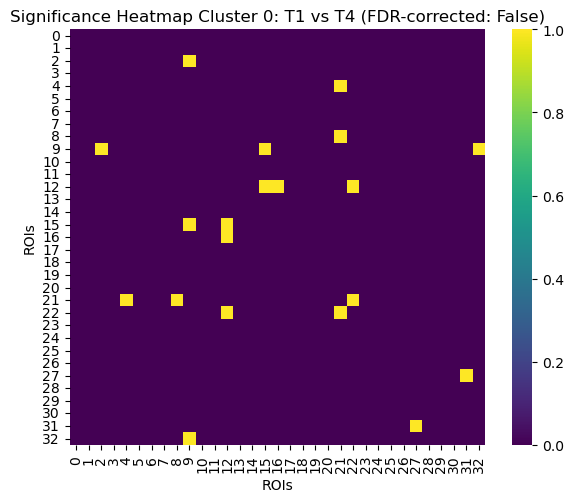


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (24, 33, 33)
Cluster 1 - Shape of T4 matrices: (24, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:01<00:00, 29.02it/s]


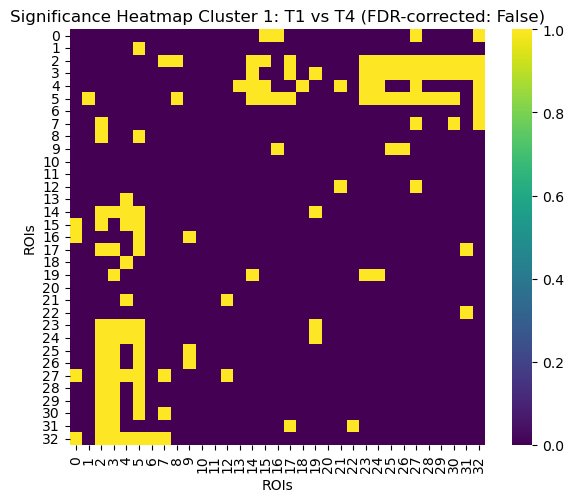

In [27]:
results = functions.get_sig_matrix(t1_t4_matrices_labeled, tp=4, correction=False, alpha=0.05, cluster=True)

Shape of T1 matrices: (65, 33, 33)
Shape of T3 matrices: (44, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:01<00:00, 31.91it/s]


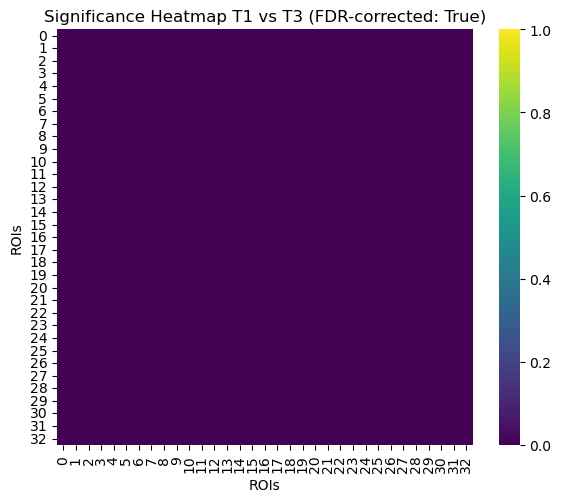

Shape of T1 matrices: (65, 33, 33)
Shape of T3 matrices: (44, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 36.14it/s]


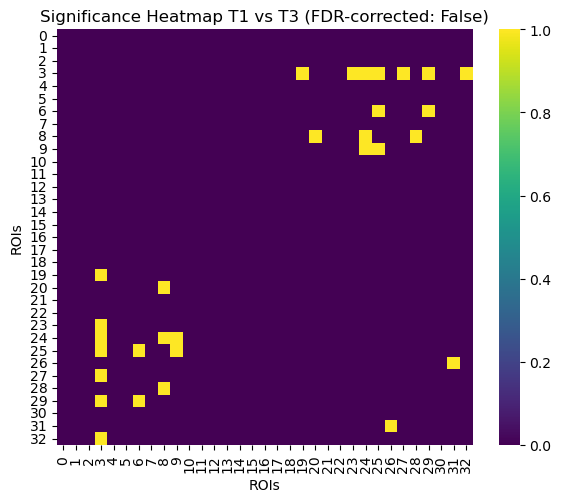


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (12, 33, 33)
Cluster 0 - Shape of T4 matrices: (12, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 35.17it/s]


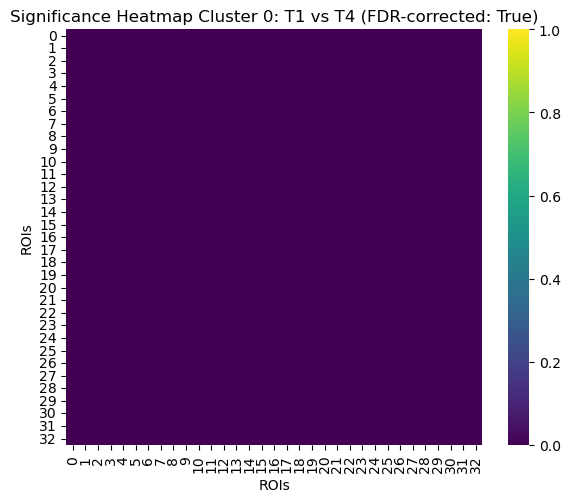


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (24, 33, 33)
Cluster 1 - Shape of T4 matrices: (24, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 36.15it/s]


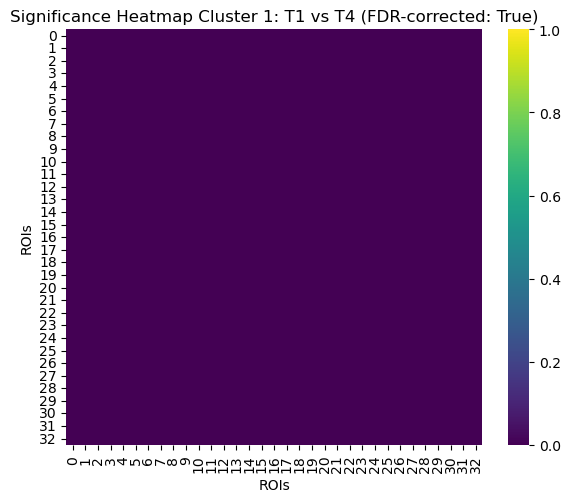


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (12, 33, 33)
Cluster 0 - Shape of T4 matrices: (12, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 34.70it/s]


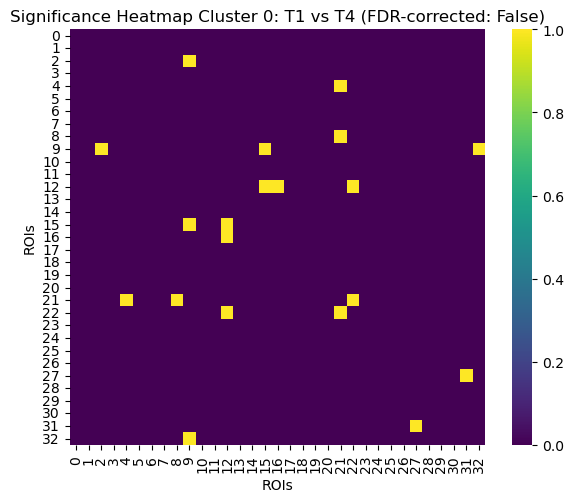


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (24, 33, 33)
Cluster 1 - Shape of T4 matrices: (24, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:01<00:00, 22.42it/s]


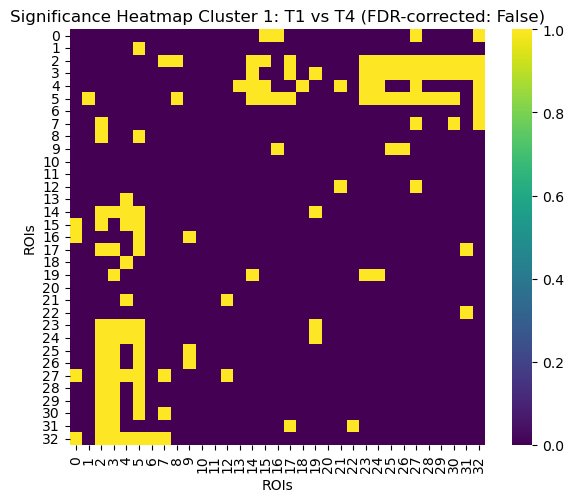

Shape of T1 matrices: (65, 33, 33)
Shape of T4 matrices: (42, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 33.44it/s]


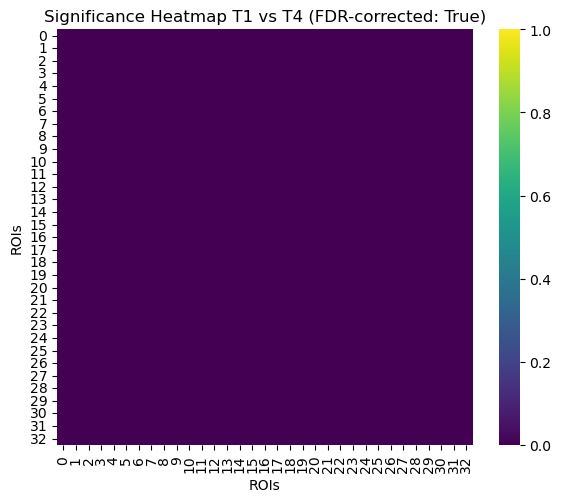

Shape of T1 matrices: (65, 33, 33)
Shape of T4 matrices: (42, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:00<00:00, 34.20it/s]


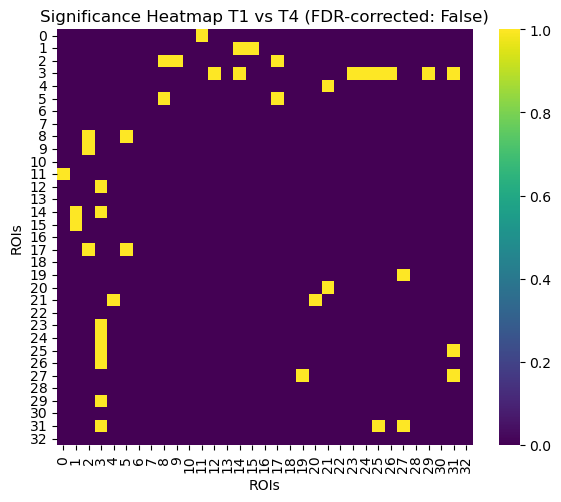

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[       nan, 0.25551029, 0.4015783 , ..., 0.64122593, 0.62244395,
         0.34159699],
        [0.25551029,        nan, 0.52060866, ..., 0.34481731, 0.26292186,
         0.87332444],
        [0.4015783 , 0.52060866,        nan, ..., 0.16426855, 0.37499409,
         0.09500018],
        ...,
        [0.64122593, 0.34481731, 0.16426855, ...,        nan, 0.55472845,
         0.6415112 ],
        [0.62244395, 0.26292186, 0.37499409, ..., 0.55472845,        nan,
         0.50564467],
        [0.34159699, 0.87332444, 0.09500018, ..., 0.6415112 , 0.50564467,
                nan]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [Fal

In [28]:
functions.get_sig_matrix(t1_t3_matrices, tp=3, correction=True, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t3_matrices, tp=3, correction=False, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t4_matrices_labeled, tp=4, correction=True, alpha=0.05, cluster=True)
functions.get_sig_matrix(t1_t4_matrices_labeled, tp=4, correction=False, alpha=0.05, cluster=True)
functions.get_sig_matrix(t1_t4_matrices, tp=4, correction=True, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t4_matrices, tp=4, correction=False, alpha=0.05, cluster=False)

#### For yeo

In [ ]:
# GOOD !!!!

yeo_path = "data/hcp_mmp10_yeo7_modes_indices.csv"
yeo = pd.read_csv(yeo_path, names=['Yeo_Network'])
yeo['Glasser_Index'] = range(1, 361)
new_rows = pd.DataFrame({
    'Glasser_Index': range(361, 380),      # 360 to 379 inclusive
    'Yeo_Network': 8               # constant value 8
})

region_to_yeo = pd.concat([yeo, new_rows], ignore_index=True)
region_to_yeo.Yeo_Network = region_to_yeo.Yeo_Network - 1
region_to_yeo.Glasser_Index = region_to_yeo.Glasser_Index - 1
region_to_yeo

,Yeo_Network,Glasser_Index
0,0,0
1,2,1
2,0,2
3,0,3
4,0,4
...,...,...
374,7,374
375,7,375
376,7,376
377,7,377


In [ ]:
network_to_indices = region_to_yeo.groupby('Yeo_Network')['Glasser_Index'].apply(list).to_dict()
#full_rois = np.arange(1, 379)
t1_matrix = t1_matrices.T1_matrix[1] # not none matrix to test

In [ ]:
print("Yeo network keys:", list(network_to_indices.keys()))
print("glasser keys:", list(network_to_indices.values()))

Yeo network keys: [0, 1, 2, 3, 4, 5, 6, 7]
glasser keys: [[0, 2, 3, 4, 5, 6, 12, 15, 17, 18, 19, 20, 21, 22, 118, 120, 125, 126, 141, 145, 151, 152, 153, 154, 155, 157, 158, 159, 162, 180, 181, 182, 183, 184, 185, 186, 192, 195, 196, 197, 198, 199, 200, 201, 202, 298, 300, 305, 306, 321, 331, 332, 333, 334, 335, 337, 338, 339, 342], [7, 8, 23, 35, 38, 39, 40, 50, 51, 52, 53, 54, 55, 99, 100, 101, 102, 103, 106, 123, 124, 138, 167, 172, 173, 174, 187, 188, 203, 215, 218, 219, 220, 230, 231, 232, 233, 234, 235, 278, 279, 280, 281, 282, 283, 286, 294, 303, 304, 347, 352, 353, 354], [1, 9, 10, 16, 41, 44, 45, 46, 47, 48, 49, 94, 95, 115, 116, 135, 136, 137, 140, 142, 156, 189, 190, 206, 221, 224, 225, 226, 227, 228, 229, 259, 274, 275, 295, 296, 315, 316, 317, 319, 320, 322, 325, 336], [24, 36, 37, 42, 43, 56, 58, 59, 77, 98, 104, 105, 107, 108, 112, 113, 114, 139, 146, 147, 166, 168, 177, 191, 204, 207, 216, 217, 222, 223, 236, 237, 238, 239, 257, 284, 285, 287, 288, 291, 292, 293, 318, 3

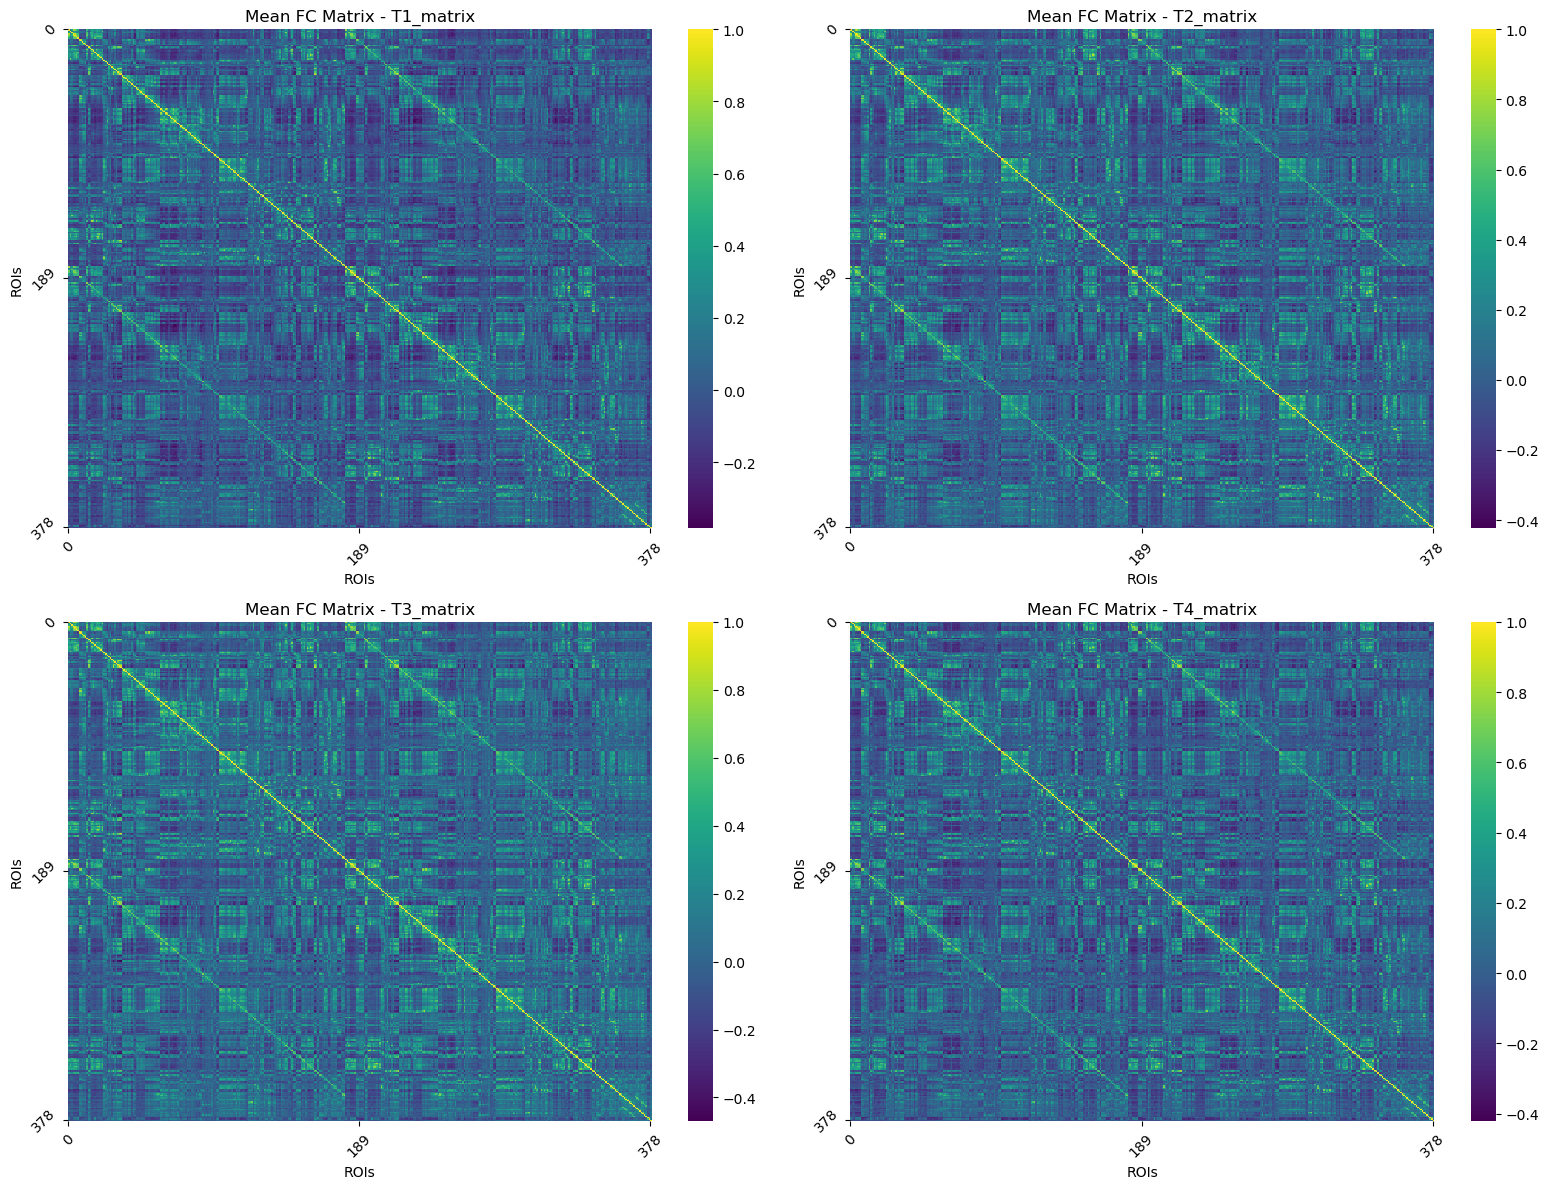

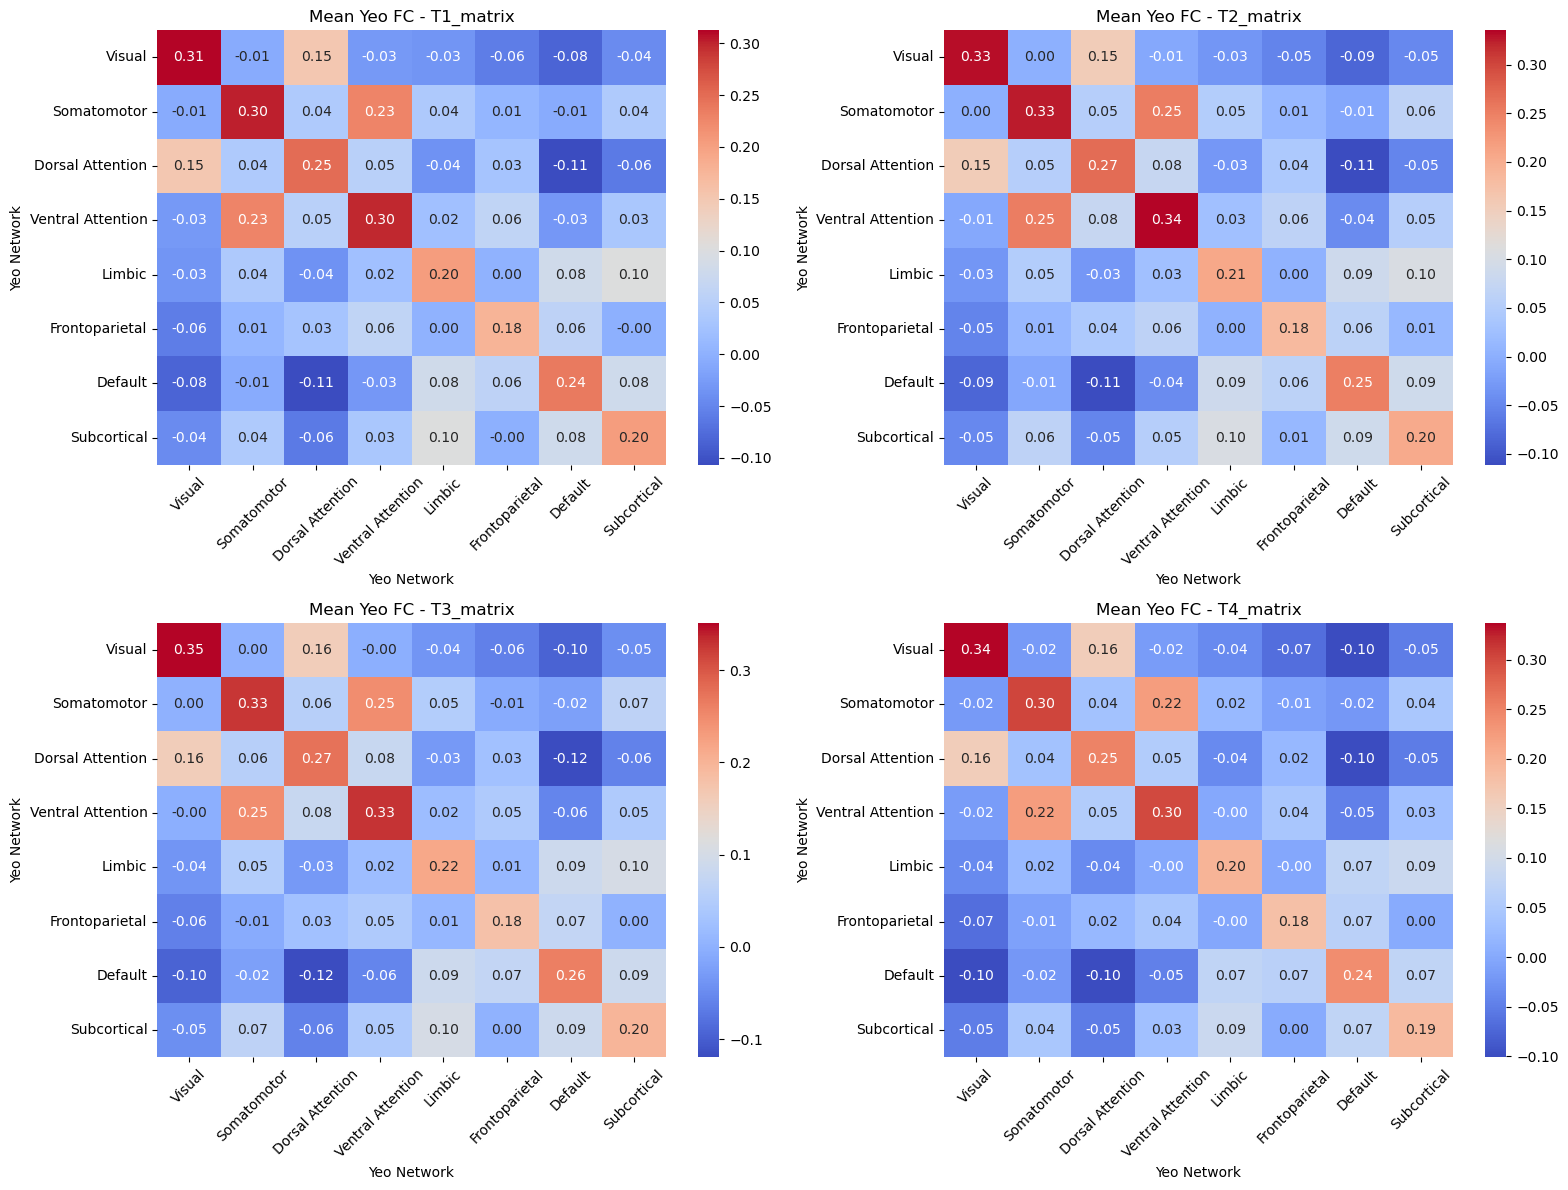

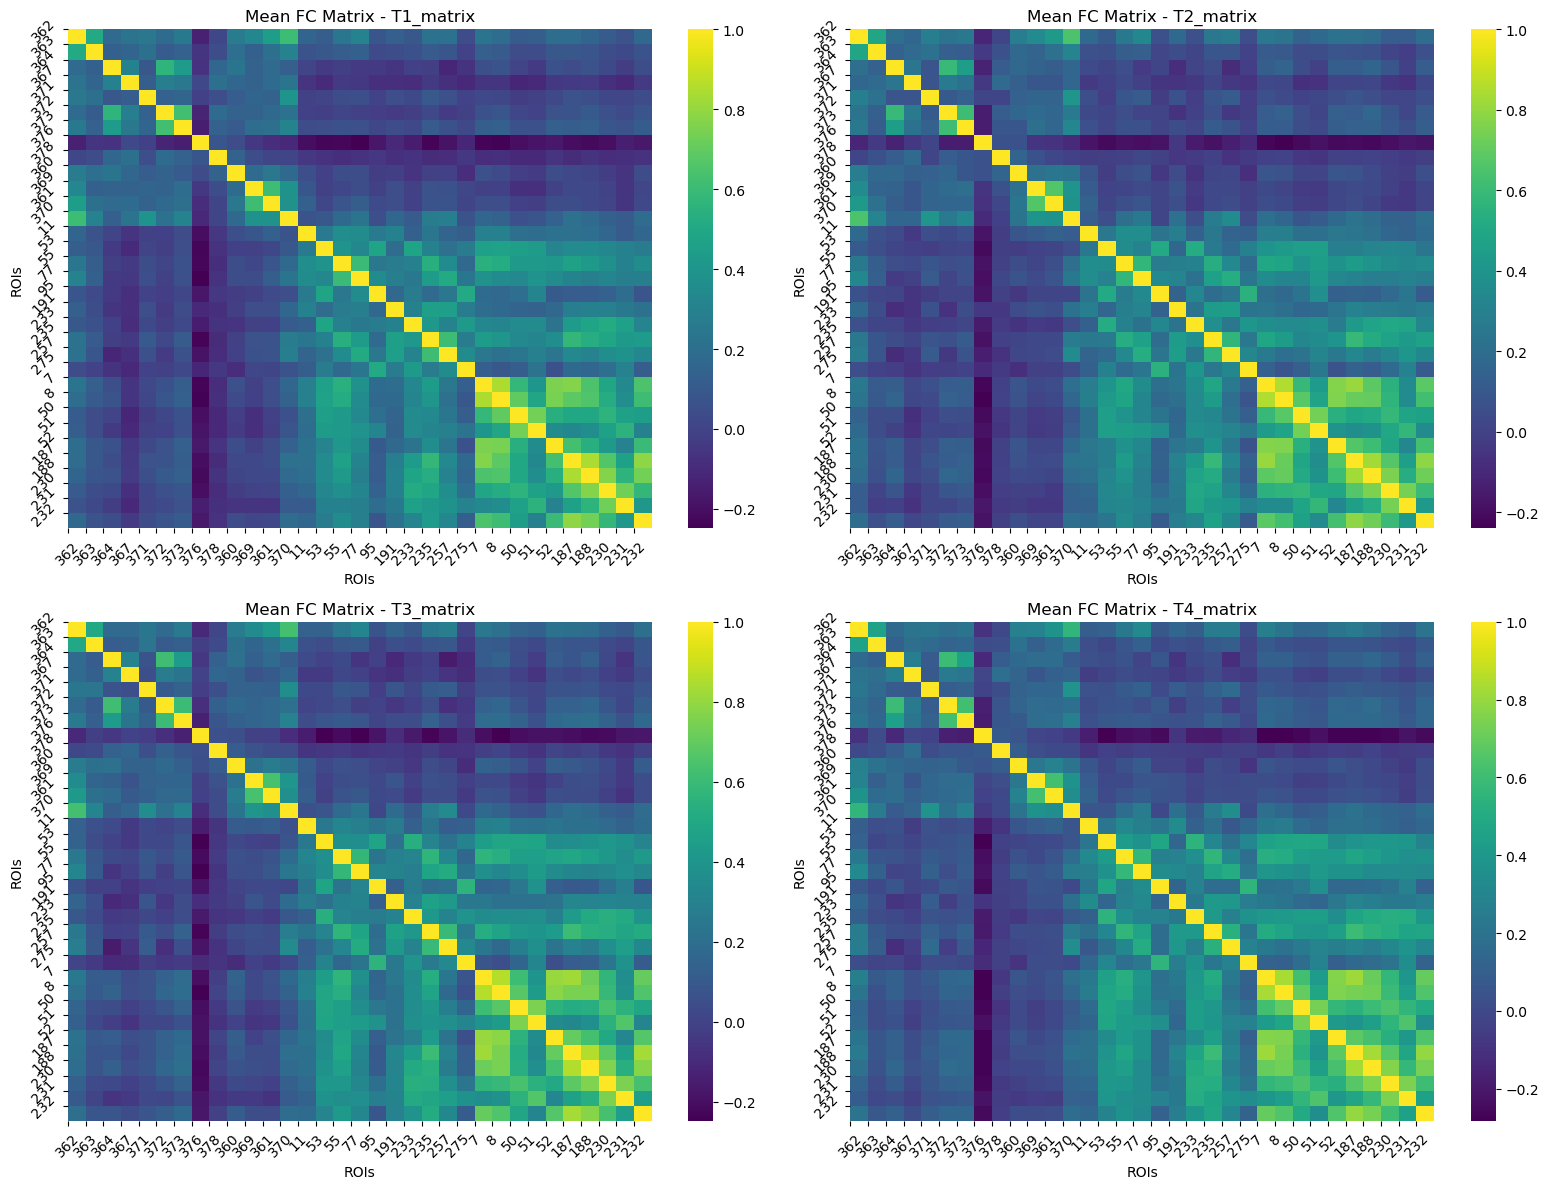

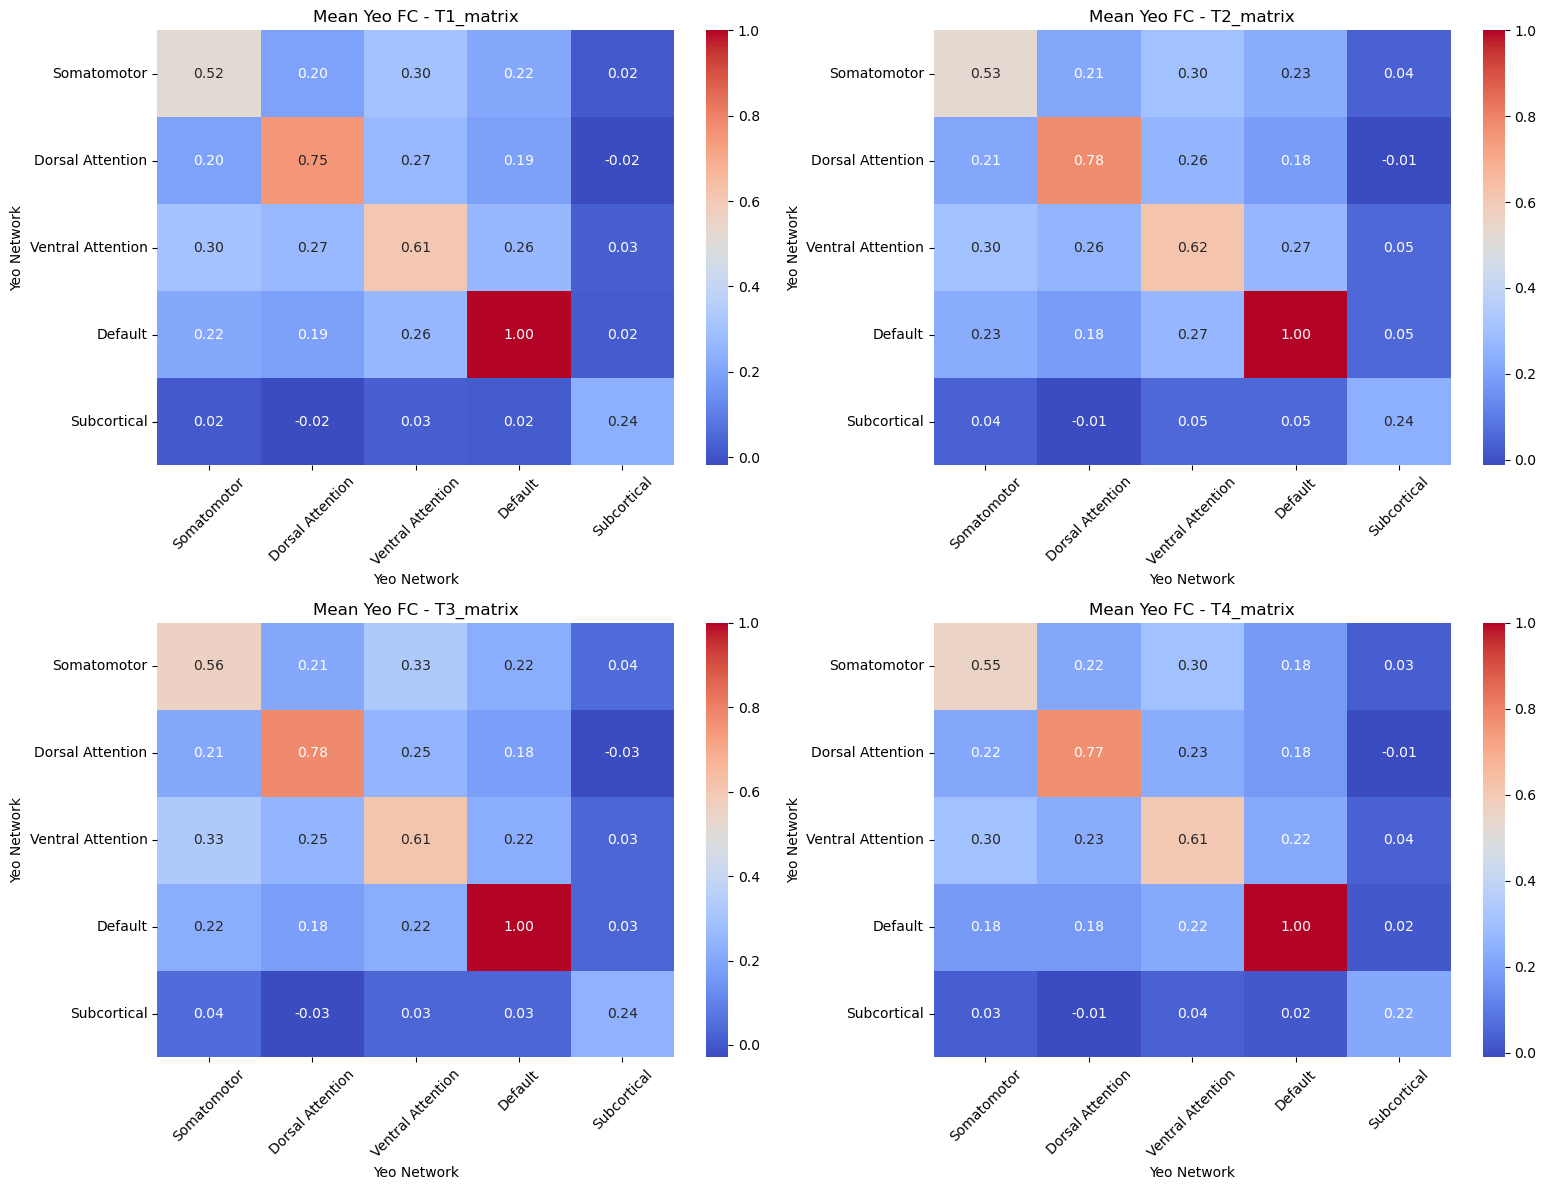

In [ ]:
rois_sub = rois
rois_full = np.arange(0, 379)
t1_matrices, t1_subjects, t1_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois = rois_sub, type='t1_only', plot=True)
#t1_matrices, t1_subjects, t1_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois = rois_full, type='t1_only', plot=True)

In [ ]:
import importlib
importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

Shape of T1 matrices: (65, 8, 8)
Shape of T3 matrices: (44, 8, 8)


100%|██████████| 8/8 [00:00<00:00, 72.80it/s]


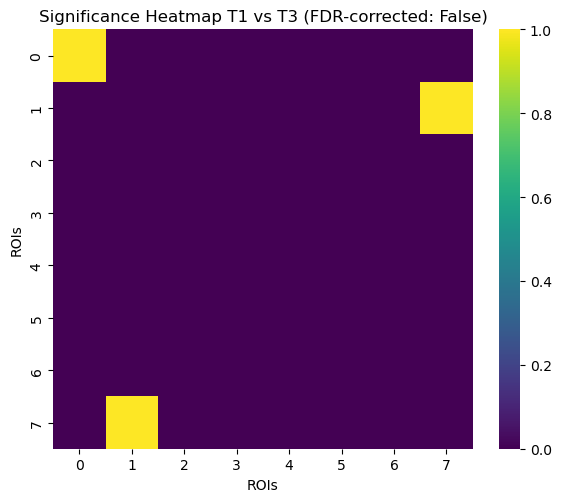

,ROI_1,ROI_2,Comparison,p_value,effect_size
0,Somatomotor,Subcortical,Somatomotor - Subcortical,0.038232,1


Shape of T1 matrices: (65, 8, 8)
Shape of T4 matrices: (42, 8, 8)


100%|██████████| 8/8 [00:00<00:00, 101.42it/s]


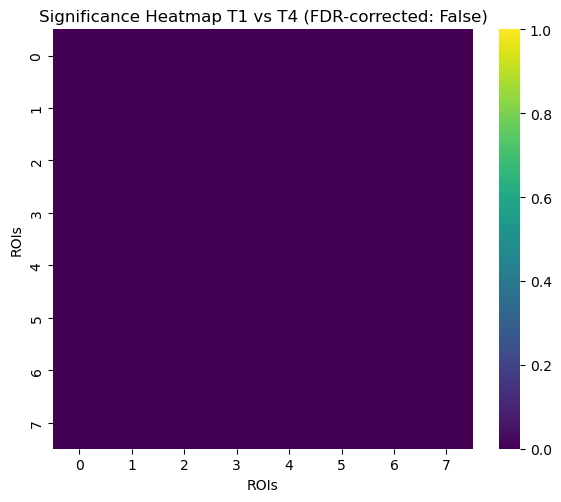

KeyError: "None of [Index(['ROI_1', 'ROI_2', 'Comparison', 'p_value', 'effect_size'], dtype='object')] are in the [columns]"

In [ ]:
#results = functions.get_sig_matrix(all_matrices_clustered_v2, rois, correction=correction, alpha=alpha, cluster=cluster)    
# Convert all_yeo_matrices to DataFrame and fill missing values with None

all_matrices, all_subjects, all_yeo, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois = rois_sub, type='all', plot=False)

significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(all_yeo, correction=False, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
display(summary)

significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(all_yeo, tp=4,correction=False, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
summary

In [ ]:
for col in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
        all_matrices[col] = all_matrices[col].apply(lambda mat: mat.iloc[rois, rois] if mat is not None else None)
significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(all_matrices, tp=4,correction=False, alpha=0.05, cluster=True)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
summary

IndexError: positional indexers are out-of-bounds

In [ ]:
region_to_yeo = functions.get_yeo_labels(yeo_path)
print(region_to_yeo)
#yeo_1, yeo_2 = functions.compute_and_plot_mean_yeo_matrices(all_matrices, region_to_yeo, rois)
all_matrices.T1_matrix[1].shape

     Yeo_Network  Glasser_Index
0              0              0
1              2              1
2              0              2
3              0              3
4              0              4
..           ...            ...
374            7            374
375            7            375
376            7            376
377            7            377
378            7            378

[379 rows x 2 columns]


(33, 33)

### Look at difference between FC

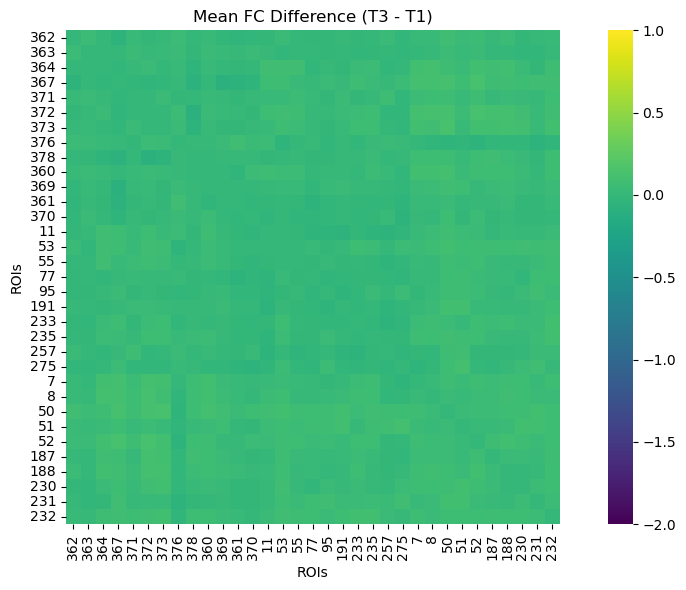

In [ ]:
t1_t3_matched_diff = functions.compute_FC_diff(t1_t3_matched, rois, tp = 3)

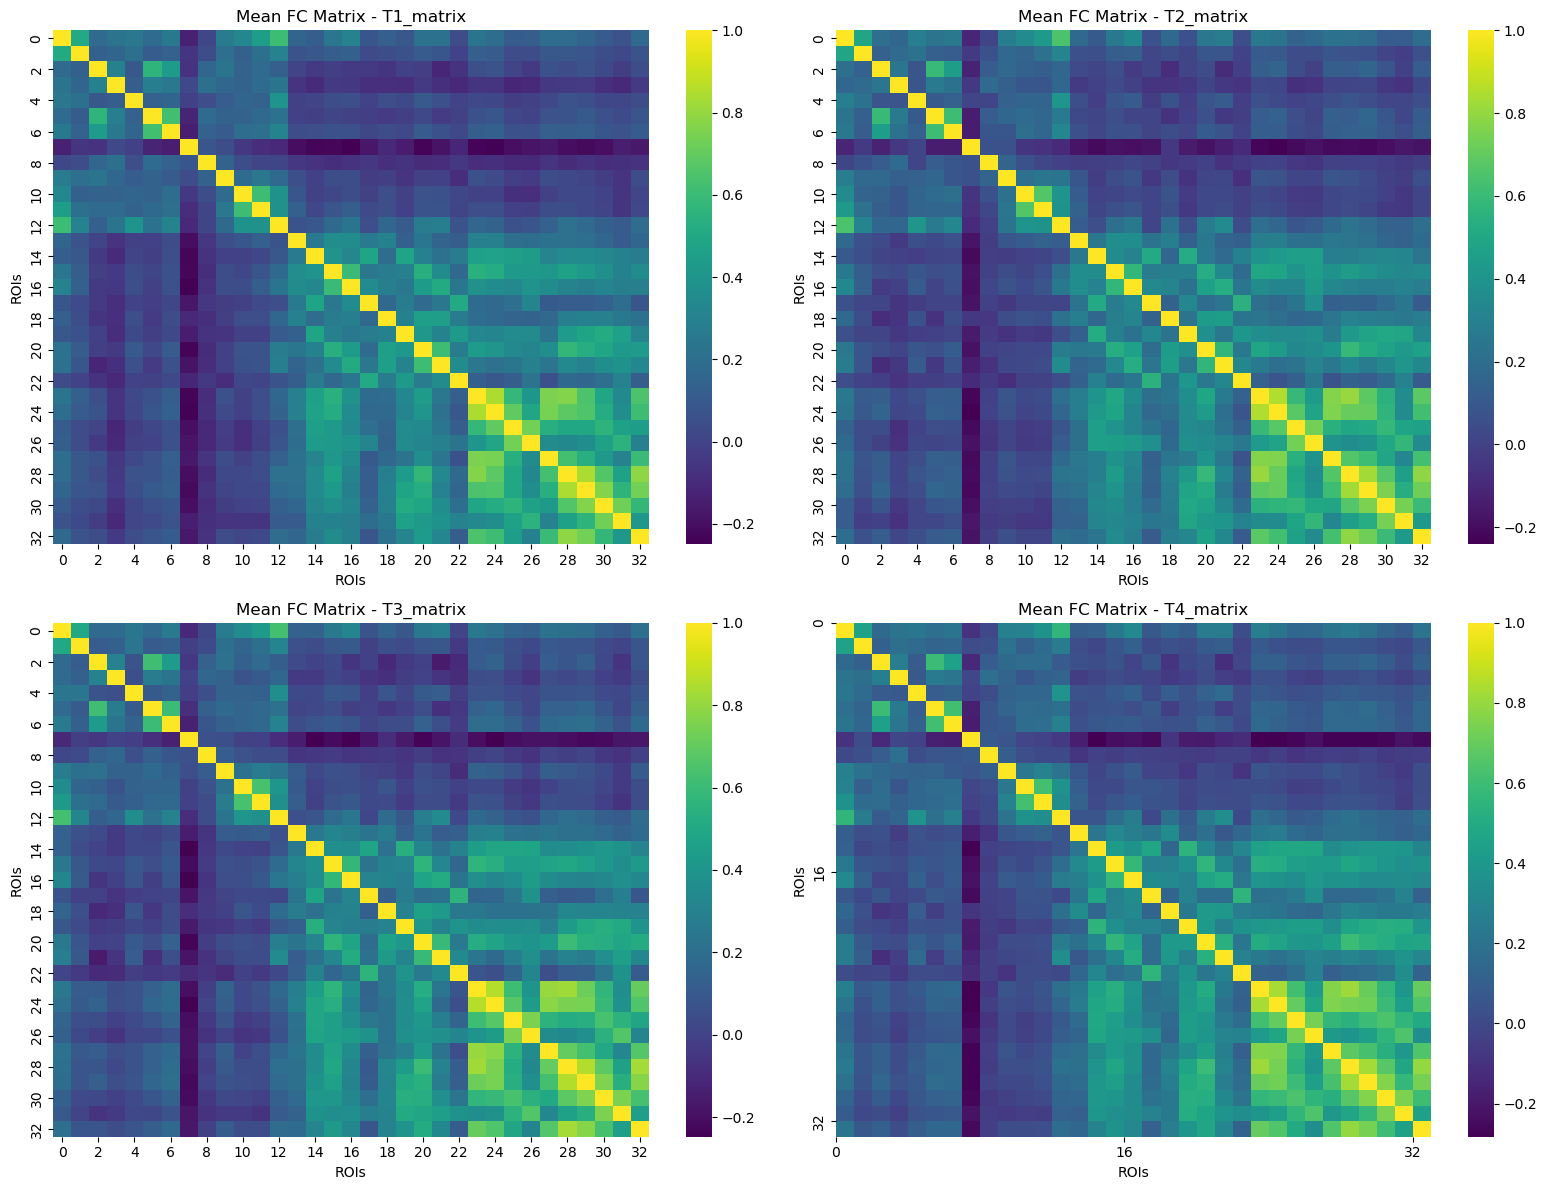

In [ ]:
functions.plot_mean_FC_matrices(all_matrices, rois)

### Regression Analysis

#### Test normality and do t-tests

In [20]:
functions.test_normality(regression_info)

                               Variable         W       p-value  \
0                     lesion_volume_mm3  0.662422  1.387019e-25   
1                                 NIHSS  0.599826  1.894083e-27   
2                       FAB_abstraction  0.330186  1.608263e-33   
3                       FAB_flexibility  0.765989  8.369961e-22   
4                     FAB_programmation  0.526658  2.335800e-29   
5       FAB_sensitivity_to_interference  0.379692  1.418530e-32   
6                FAB_inhibitory_control  0.583891  6.911108e-28   
7            FAB_environmental_autonomy  0.122960  5.953099e-37   
8                               FAB_TOT  0.777710  2.673758e-21   
9                     Stroop_color_time  0.485765  2.520191e-30   
10                   Stroop_color_error  0.269896  1.343274e-34   
11                    Stroop_words_time  0.591968  1.147657e-27   
12                   Stroop_words_error  0.280795  2.077752e-34   
13             Stroop_interference_time  0.767888  1.007287e-2

,Variable,W,p-value,Normal? (p > 0.05)
0,lesion_volume_mm3,0.662422,1.387019e-25,False
1,NIHSS,0.599826,1.894083e-27,False
2,FAB_abstraction,0.330186,1.608263e-33,False
3,FAB_flexibility,0.765989,8.369961e-22,False
4,FAB_programmation,0.526658,2.335800e-29,False
5,FAB_sensitivity_to_interference,0.379692,1.418530e-32,False
6,FAB_inhibitory_control,0.583891,6.911108e-28,False
7,FAB_environmental_autonomy,0.122960,5.953099e-37,False
8,FAB_TOT,0.777710,2.673758e-21,False
9,Stroop_color_time,0.485765,2.520191e-30,False


only SMN_intra_unaff_FC is normal !

now I will look at wilcoxon score for different timepoints

In [21]:
results = functions.motor_longitudinal(regression_info, tp=4)
results

,Task,n,p-value,Statistically sig. change between TP
0,FAB_abstraction,42,0.033895,Yes
1,FAB_flexibility,42,0.046905,Yes
2,FAB_programmation,42,0.341184,No
3,FAB_sensitivity_to_interference,42,0.053665,No
4,FAB_inhibitory_control,42,0.007167,Yes
5,FAB_environmental_autonomy,42,0.563703,No
6,FAB_TOT,42,0.000472,Yes
7,Stroop_color_time,42,0.378468,No
8,Stroop_color_error,42,0.045737,Yes
9,Stroop_words_time,42,0.047455,Yes


le code en dessous sert à rien je pense

In [22]:
# Split subjects based on "Lesion_side"
lesion_left = regression_info[regression_info['Lesion_side'] == 'L']
lesion_right = regression_info[regression_info['Lesion_side'] == 'R']
lesion_both = regression_info[regression_info['Lesion_side'] == 'R/L']
lesion_unknown = regression_info[~regression_info['Lesion_side'].isin(['L', 'R', 'R/L'])]

# Print the number of subjects in each group
print(f"Left Lesion: {len(lesion_left)} subjects")
print(f"Right Lesion: {len(lesion_right)} subjects")
print(f"Bilateral Lesion: {len(lesion_both)} subjects")
print(f"Unknown Lesion: {len(lesion_unknown)} subjects")

Left Lesion: 148 subjects
Right Lesion: 184 subjects
Bilateral Lesion: 8 subjects
Unknown Lesion: 4 subjects


In [ ]:
from scipy.stats import wilcoxon

start_col='FAB_abstraction'
end_col='nmf_motor'
cols_to_keep = ['subject_full_id','TimePoint','Lesion_side'] + regression_info.loc[:, start_col:end_col].columns.tolist()

regression_info_part = regression_info[cols_to_keep]
lesion_left = regression_info_part[regression_info_part['Lesion_side'] == 'L']
lesion_right = regression_info_part[regression_info_part['Lesion_side'] == 'R']
lesion_both = regression_info_part[regression_info_part['Lesion_side'] == 'R/L']
lesion_unknown = regression_info_part[~regression_info_part['Lesion_side'].isin(['L', 'R', 'R/L'])]

score_T1_L = lesion_left[lesion_left.TimePoint == "T1"].copy().dropna()
score_T_L = lesion_left[lesion_left.TimePoint == f"T3"].copy().dropna()

score_T1_R = lesion_right[lesion_right.TimePoint == "T1"].copy().dropna()
score_T_R = lesion_right[lesion_right.TimePoint == f"T3"].copy().dropna()

# Match score_T1 and score_T3 based on 'subject_full_id'
common_ids = set(score_T1_L['subject_full_id']).intersection(score_T_L['subject_full_id'])
score_T1_L_matched = score_T1_L[score_T1_L['subject_full_id'].isin(common_ids)].set_index('subject_full_id').drop(columns=['TimePoint','Lesion_side'])
score_T_L_matched = score_T_L[score_T_L['subject_full_id'].isin(common_ids)].set_index('subject_full_id').drop(columns=['TimePoint','Lesion_side'])
common_ids = set(score_T1_R['subject_full_id']).intersection(score_T_R['subject_full_id'])
score_T1_R_matched = score_T1_R[score_T1_R['subject_full_id'].isin(common_ids)].set_index('subject_full_id').drop(columns=['TimePoint','Lesion_side'])
score_T_R_matched = score_T_R[score_T_R['subject_full_id'].isin(common_ids)].set_index('subject_full_id').drop(columns=['TimePoint','Lesion_side'])


# Run Wilcoxon test across columns (axis=0)
stat_L, p_L = wilcoxon(score_T1_L_matched, score_T_L_matched, axis=0)
stat_R, p_R = wilcoxon(score_T1_R_matched, score_T_R_matched, axis=0)

results_L = []
results_R = []
for col in score_T1_L_matched.columns:
    try:
        stat, pval = wilcoxon(score_T1_L_matched[col], score_T_L_matched[col])
        results_L.append({
            'Task': col, 
            'n': len(score_T1_L_matched), 
            'p-value': pval, 
            'Statistically sig. change between TP': 'Yes' if pval < 0.05 else 'No'
        })
    except ValueError:
        results_L.append({
            'Task': col, 
            'n': len(score_T1_L_matched), 
            'p-value': None, 
            'Statistically sig. change between TP': 'No'
        })
for col in score_T1_R_matched.columns:
    try:
        stat, pval = wilcoxon(score_T1_R_matched[col], score_T_R_matched[col])
        results_R.append({
            'Task': col, 
            'n': len(score_T1_R_matched), 
            'p-value': pval, 
            'Statistically sig. change between TP': 'Yes' if pval < 0.05 else 'No'
        })
    except ValueError:
        results_R.append({
            'Task': col, 
            'n': len(score_T1_R_matched), 
            'p-value': None, 
            'Statistically sig. change between TP': 'No'
        })
results_L_df = pd.DataFrame(results_L)
results_R_df = pd.DataFrame(results_R)

/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in divide
  z = (r_plus - mn) / se


#### Run regression on all_df for T3

In [48]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

'''def flatten_fc_matrix(mat):
    if isinstance(mat, pd.DataFrame):
        mat = mat.values
    return mat[np.triu_indices_from(mat, k=1)]'''
    
def flatten_rows_only(mat):
    mat = mat.values if isinstance(mat, pd.DataFrame) else mat
    return mat.flatten()


def prepare_regression_data(fc_df, behavior_df, behavior_col):
    """
    Extract feature vectors (flattened striatal-to-brain FC rows) and target variable for regression.
    
    Args:
        fc_df (pd.DataFrame): DataFrame with 'subject_id' and 'T1_matrix'.
        behavior_df (pd.DataFrame): DataFrame with 'subject_id' and behavioral outcome.
        behavior_col (str): Column in behavior_df to predict.

    Returns:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target variable.
        subject_ids (list): List of subject IDs.
    """
    X, y, subject_ids = [], [], []

    for idx, row in fc_df.iterrows():
        subj_id = row['subject_id']
        mat = row['T1_matrix']
        if mat is None:
            continue

        # Get corresponding behavioral score
        match = behavior_df[behavior_df['subject_id'] == subj_id]
        if match.empty or pd.isna(match[behavior_col].values[0]):
            continue

        # Flatten the FC rows (striatal connectivity to whole brain)
        features = flatten_rows_only(mat)

        X.append(features)
        y.append(match[behavior_col].values[0])
        subject_ids.append(subj_id)

    return np.array(X), np.array(y), subject_ids


def run_behavior_regression(fc_df, behavior_df, behavior_cols):
    """
    Runs ridge regression for each behavioral outcome.
    """
    results = {}
    
    for target in behavior_cols:
        print(f"\n Regressing on: {target}")

        X, y, subject_ids = prepare_regression_data(fc_df, behavior_df, target)
        print(f"Subjects matched: {len(subject_ids)}, Features per subject: {X.shape[1]}")

        # Standardize
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Ridge regression with CV
        ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
        scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')

        print(f"Cross-validated R2 scores: {scores}")
        print(f"Mean R2: {np.mean(scores):.3f}")

        results[target] = {
            'subject_ids': subject_ids,
            'mean_r2': np.mean(scores),
            'r2_scores': scores
        }

    return results

# Step 1: Load behavioral and matrix data
regression_info, rsfMRI_info = functions.load_excel_data(excel_folder_path)
rois_full = np.arange(0, 379)

all_df, subjects, _, _ = functions.load_matrices(folder_path, rsfMRI_info, rois=rois_full, type='all', plot=False)

selected_rois_labels = [362, 363, 364, 367, 371, 372, 373, 376]

# Keep only striatal rows (connections from striatum to entire brain)
'''for col in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if col in all_df.columns:
        all_df[col] = all_df[col].apply(lambda mat: mat.loc[selected_rois_labels, :] if mat is not None else None)'''

# Step 2: Run regression
behavior_cols = ['Fugl_Meyer_right_TOTAL', 'Fugl_Meyer_left_TOTAL', 'nmf_motor']
regression_info_T3 = regression_info[regression_info["TimePoint"] == "T3"].copy()
regression_info_T3["subject_id"] = regression_info_T3["subject_full_id"].astype(str).str[-4:]
regression_results = run_behavior_regression(all_df, regression_info_T3, behavior_cols)



 Regressing on: Fugl_Meyer_right_TOTAL
Subjects matched: 65, Features per subject: 143641
Cross-validated R2 scores: [-0.27533117 -1.77231444 -6.84554049 -1.52726732 -0.11999909]
Mean R2: -2.108

 Regressing on: Fugl_Meyer_left_TOTAL
Subjects matched: 65, Features per subject: 143641
Cross-validated R2 scores: [-6.71632848 -0.44803256 -7.69376653 -0.25253168 -0.06502402]
Mean R2: -3.035

 Regressing on: nmf_motor
Subjects matched: 43, Features per subject: 143641
Cross-validated R2 scores: [ 0.1776443  -0.74119611 -4.41574709  0.25168901 -0.23137908]
Mean R2: -0.992


#### Now add ipsi vs contra

In [44]:
def assign_contra_ipsi_fm(df):
    df = df.copy()
    df['Fugl_Meyer_CONTRA'] = np.nan
    df['Fugl_Meyer_IPSI'] = np.nan

    mask_L = df['Lesion_side'] == 'L'
    mask_R = df['Lesion_side'] == 'R'

    df.loc[mask_L, 'Fugl_Meyer_CONTRA'] = df.loc[mask_L, 'Fugl_Meyer_right_TOTAL']
    df.loc[mask_L, 'Fugl_Meyer_IPSI'] = df.loc[mask_L, 'Fugl_Meyer_left_TOTAL']

    df.loc[mask_R, 'Fugl_Meyer_CONTRA'] = df.loc[mask_R, 'Fugl_Meyer_left_TOTAL']
    df.loc[mask_R, 'Fugl_Meyer_IPSI'] = df.loc[mask_R, 'Fugl_Meyer_right_TOTAL']

    return df


In [54]:
regression_info_T3 = assign_contra_ipsi_fm(regression_info_T3)
behavior_cols = ['Fugl_Meyer_CONTRA', 'Fugl_Meyer_IPSI']
#behavior_cols = ['Fugl_Meyer_right_TOTAL', 'Fugl_Meyer_left_TOTAL', 'nmf_motor']

regression_results = run_behavior_regression(all_df, regression_info_T3, behavior_cols)
# Display results
for target, result in regression_results.items():
    print(f"\nBehavioral Outcome: {target}")
    print(f"Mean R2: {result['mean_r2']:.3f}")
    print(f"Subject IDs: {result['subject_ids'][:5]}...")  # Display first 5 subject IDs
    print(f"R2 Scores: {result['r2_scores']}")

# J'ai perdu des subjects parce que certains ont bilateral or unknown lesions !
# Resultats toujours pas fous ...


 Regressing on: Fugl_Meyer_CONTRA
Subjects matched: 63, Features per subject: 143641
Cross-validated R2 scores: [ -0.32445554  -0.8074208  -40.58223671  -2.28867249  -0.173537  ]
Mean R2: -8.835

 Regressing on: Fugl_Meyer_IPSI
Subjects matched: 63, Features per subject: 143641
Cross-validated R2 scores: [-0.05506617 -0.20117679  0.03706626 -0.15441314 -2.14830689]
Mean R2: -0.504

Behavioral Outcome: Fugl_Meyer_CONTRA
Mean R2: -8.835
Subject IDs: ['s007', 's031', 's009', 's036', 's062']...
R2 Scores: [ -0.32445554  -0.8074208  -40.58223671  -2.28867249  -0.173537  ]

Behavioral Outcome: Fugl_Meyer_IPSI
Mean R2: -0.504
Subject IDs: ['s007', 's031', 's009', 's036', 's062']...
R2 Scores: [-0.05506617 -0.20117679  0.03706626 -0.15441314 -2.14830689]


#### Now matched subjects for T3

In [53]:
# Contra and ipsi
behavior_cols = ['Fugl_Meyer_CONTRA', 'Fugl_Meyer_IPSI']
t1_t3_matched_reg = run_behavior_regression(t1_t3_matched, regression_info_T3, behavior_cols)

# Other
behavior_cols = ['Fugl_Meyer_right_TOTAL', 'Fugl_Meyer_left_TOTAL', 'nmf_motor']
t1_t3_matched_reg = run_behavior_regression(t1_t3_matched, regression_info_T3, behavior_cols)


 Regressing on: Fugl_Meyer_CONTRA
Subjects matched: 37, Features per subject: 64
Cross-validated R2 scores: [ -0.42620448 -22.08915787  -2.63025431  -0.07385048  -0.07451061]
Mean R2: -5.059

 Regressing on: Fugl_Meyer_IPSI
Subjects matched: 37, Features per subject: 64
Cross-validated R2 scores: [-0.1179113  -0.00595441 -0.1309137  -0.24705228 -1.26028325]
Mean R2: -0.352

 Regressing on: Fugl_Meyer_right_TOTAL
Subjects matched: 39, Features per subject: 64
Cross-validated R2 scores: [-0.07716428 -4.07890122 -1.04695616 -6.90597009 -0.1553625 ]
Mean R2: -2.453

 Regressing on: Fugl_Meyer_left_TOTAL
Subjects matched: 39, Features per subject: 64
Cross-validated R2 scores: [ 4.95301443e-02 -4.38273662e+00 -7.05567661e-02 -5.56459985e-02
 -1.21852665e+02]
Mean R2: -25.262

 Regressing on: nmf_motor
Subjects matched: 38, Features per subject: 64
Cross-validated R2 scores: [-1.04280697 -7.80642906 -1.10265099 -0.10988185 -0.03969481]
Mean R2: -2.020


### Now T4

#### Try to keep only significant cells !

Shape of T1 matrices: (65, 33, 33)
Shape of T3 matrices: (39, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 33/33 [00:01<00:00, 32.94it/s]


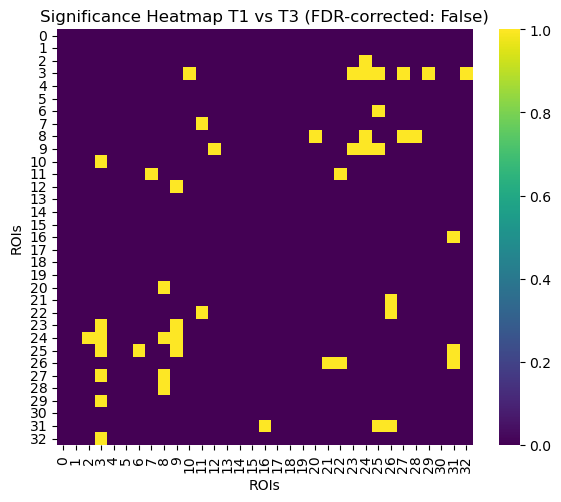

In [38]:
t1_t3_matched_sig, p_vals_corrected, reject = functions.get_sig_matrix(t1_t3_matrices_labeled, tp=3, correction=False, alpha=0.05, cluster=False)


In [41]:
selected_rois_labels = [362, 363, 364, 367, 371, 372, 373, 376] 
# Filter the significance matrix to the selected striatal ROIs
sig_subset = t1_t3_matched_sig.loc[selected_rois_labels, :]

# Identify columns (ROIs) with at least one significant connection
sig_cols = sig_subset.columns[(sig_subset != 0).any(axis=0)].tolist()

print("Significant ROIs connected to striatal ROIs:")
print(sig_cols)
def apply_significance_mask(mat, roi_rows, sig_cols):
    """
    Keep only FCs from selected ROI rows to significant columns.
    """
    if mat is None:
        return None
    return mat.loc[roi_rows, sig_cols]

for col in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if col in t1_t3_matched.columns:
        t1_t3_matched[col] = t1_t3_matched[col].apply(
            lambda mat: apply_significance_mask(mat, selected_rois_labels, sig_cols)
        )

t1_t3_matched_reg = run_behavior_regression(t1_t3_matched, regression_info_T3, behavior_cols)
# Display results
for target, result in regression_results.items():
    print(f"\nBehavioral Outcome: {target}")
    print(f"Mean R2: {result['mean_r2']:.3f}")
    print(f"Subject IDs: {result['subject_ids'][:5]}...")  # Display first 5 subject IDs
    print(f"R2 Scores: {result['r2_scores']}")

Significant ROIs connected to striatal ROIs:
[369, 361, 7, 8, 50, 52, 188, 232]

 Regressing on: Fugl_Meyer_right_TOTAL
Subjects matched: 39, Features per subject: 64
Cross-validated R2 scores: [-0.07716428 -4.07890122 -1.04695616 -6.90597009 -0.1553625 ]
Mean R2: -2.453

 Regressing on: Fugl_Meyer_left_TOTAL
Subjects matched: 39, Features per subject: 64
Cross-validated R2 scores: [ 4.95301443e-02 -4.38273662e+00 -7.05567661e-02 -5.56459985e-02
 -1.21852665e+02]
Mean R2: -25.262

 Regressing on: nmf_motor
Subjects matched: 38, Features per subject: 64
Cross-validated R2 scores: [-1.04280697 -7.80642906 -1.10265099 -0.10988185 -0.03969481]
Mean R2: -2.020

Behavioral Outcome: Fugl_Meyer_right_TOTAL
Mean R2: -2.613
Subject IDs: ['s007', 's031', 's009', 's036', 's062']...
R2 Scores: [-0.60710965 -1.72757199 -6.79662386 -3.83813978 -0.09707552]

Behavioral Outcome: Fugl_Meyer_left_TOTAL
Mean R2: -5.720
Subject IDs: ['s007', 's031', 's009', 's036', 's062']...
R2 Scores: [ -9.64025989   0.2

#### Now look at 

### Plotting subject pool for the slides

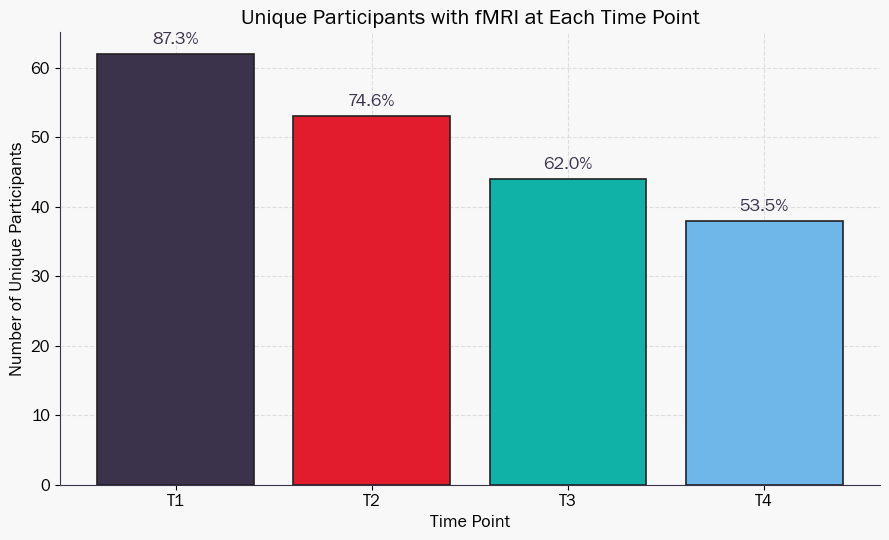

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "Franklin Gothic Book",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 13,
    "axes.labelweight": "bold",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.edgecolor": "#3B324C",
    "axes.grid": True,
    "grid.color": "#D3D3D3",
    "grid.linestyle": "--",
    "grid.alpha": 0.7,
})

fig, ax = plt.subplots(figsize=(9, 5.5))
bars = ax.bar(unique_counts.index, unique_counts.values, color=bar_colors, edgecolor="#222", linewidth=1.2)

for bar, pct in zip(bars, percentages_corrected):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{pct}%', 
            ha='center', va='bottom', fontsize=13, fontweight='bold', color="#3B324C", family="Franklin Gothic Book")

ax.set_title("Unique Participants with fMRI at Each Time Point")
ax.set_xlabel("Time Point")
ax.set_ylabel("Number of Unique Participants")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

# Set transparent background when saving (if needed)
fig.savefig("unique_participants.png", transparent=True)
